**Instruction for POS Tagging Using RNNs with Arabic Dataset**

**Dataset:**
The dataset provided is named "Assignment 2 - Arabic POS.conllu". It contains labeled data for Arabic text with Part-of-Speech (POS) tags in CoNLL-U format.

**Objective:**
Your objective is to perform Part-of-Speech (POS) tagging on Arabic text using Recurrent Neural Networks (RNNs). Specifically, you will use the Universal POS (UPOS) tags for tagging. UPOS is a standardized set of POS tags that aims to cover all languages.

**Evaluation metric:**
Accuracy

**Instructions:**
1. **Data Preprocessing:**
   - Load the provided dataset "Assignment 2 - Arabic POS.conllu". You can use pyconll library
   - Preprocess the data as necessary, including tokenization

2. **Model Building:**
   - Design an RNN-based model architecture suitable for POS tagging. You may consider using recurrent layers such as (LSTM) or (GRU).
   - Define the input and output layers of the model. The input layer should accept sequences of tokens, and the output layer should produce the predicted UPOS tags for each token.

3. **Training:**

4. **Evaluation:**

**Additional Notes:**
- Make sure to document your code thoroughly and provide clear explanations for each step.
- Feel free to explore different RNN architectures, hyperparameters, and optimization techniques to improve the model's accuracy.

### Import used libraries

In [255]:
import re
import pyconll
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Bidirectional, Dropout ,SimpleRNN ,GRU
from tensorflow.keras.callbacks import ModelCheckpoint

### Load Dataset

In [170]:
corpus = pyconll.load_from_file("/content/Assignment 2 - Arabic POS.conllu")

### Data Clean and Splitting

In [181]:
for i,sentence in enumerate(corpus):
  seq =[]
  for token in sentence:
    seq.append(token.form)
  print(seq)
  if i ==5:
    break

['برلين', 'ترفض', 'حصول', 'شركة', 'اميركية', 'على', 'رخصة', 'تصنيع', 'دبابة', '"', 'ليوبارد', '"', 'الالمانية']
['برلين', '15', '-', '7', '(', 'اف', 'ب', ')', '-', 'افادت', 'صحيفة', 'الاحد', 'الالمانية', '"', 'ويلت', 'ام', 'سونتاغ', '"', 'في', 'عددها', 'عدد', 'ها', 'الصادر', 'غدا', '،', 'ان', 'المستشار', 'غيرهارد', 'شرودر', 'يرفض', 'حصول', 'المجموعة', 'الاميركية', '"', 'جنرال', 'ديناميكس', '"', 'على', 'رخصة', 'لتصنيع', 'ل', 'تصنيع', 'الدبابة', 'الالمانية', '"', 'ليوبارد', '2', '"', 'عبر', 'شراء', 'المجموعة', 'الحكومية', 'الاسبانية', 'للاسلحة', 'ل', 'الأسلحة', '"', 'سانتا', 'بربارة', '"', '.']
['وفي', 'و', 'في', 'نيسان', '/', 'ابريل', 'الماضي', '،', 'تخلت', 'الدولة', 'الاسبانية', 'عن', 'مجموعة', '"', 'سانتا', 'بربارة', '"', 'التي', 'تصنع', 'دبابات', 'ليوبارد', 'الالمانية', '،', 'الى', '"', 'جنرال', 'ديناميكس', '"', 'التي', 'تنتج', 'الدبابة', 'الاميركية', '"', 'ام', '1', 'ابرامس', '"', 'المعتبرة', 'المنافسة', 'الرئيسية', 'لدبابة', 'ل', 'دبابة', 'ليوبارد', 'في', 'الاسواق', '.']
['وكانت', 

In [182]:
def clean_data(token):
    if len(token) == 1 and re.match(r'[\u0600-\u06FF]', token):
        return ''
    return token

def clean_upos(pos):
    cleaned_pos = re.sub(r'[X]', '', pos)
    return cleaned_pos

clean_sentences = []
clean_upos_tags = []

for sentence in corpus:
    clean_tokens = []
    clean_tags = []
    for token in sentence:
        if token.form and token.upos:
            token_after_clean = clean_data(token.form)
            pos_after_clean = clean_upos(token.upos)
            if token_after_clean and pos_after_clean :
                clean_tokens.append(token_after_clean)
                clean_tags.append(pos_after_clean)
    if clean_tokens:
        clean_sentences.append(clean_tokens)
        clean_upos_tags.append(clean_tags)

In [183]:
list1 = clean_sentences[1]
list2 = clean_upos_tags[1]
for i ,j in zip(list1, list2):
  print(f"Token: {i}, UPOS: {j}")

Token: 15, UPOS: NUM
Token: -, UPOS: PUNCT
Token: 7, UPOS: NUM
Token: (, UPOS: PUNCT
Token: ), UPOS: PUNCT
Token: -, UPOS: PUNCT
Token: افادت, UPOS: VERB
Token: صحيفة, UPOS: NOUN
Token: الاحد, UPOS: NOUN
Token: الالمانية, UPOS: ADJ
Token: ", UPOS: PUNCT
Token: ", UPOS: PUNCT
Token: في, UPOS: ADP
Token: عدد, UPOS: NOUN
Token: ها, UPOS: PRON
Token: الصادر, UPOS: ADJ
Token: غدا, UPOS: NOUN
Token: ان, UPOS: SCONJ
Token: المستشار, UPOS: NOUN
Token: يرفض, UPOS: VERB
Token: حصول, UPOS: NOUN
Token: المجموعة, UPOS: NOUN
Token: الاميركية, UPOS: ADJ
Token: ", UPOS: PUNCT
Token: ", UPOS: PUNCT
Token: على, UPOS: ADP
Token: رخصة, UPOS: NOUN
Token: تصنيع, UPOS: NOUN
Token: الدبابة, UPOS: NOUN
Token: الالمانية, UPOS: ADJ
Token: ", UPOS: PUNCT
Token: 2, UPOS: NUM
Token: ", UPOS: PUNCT
Token: عبر, UPOS: ADP
Token: شراء, UPOS: NOUN
Token: المجموعة, UPOS: NOUN
Token: الحكومية, UPOS: ADJ
Token: الاسبانية, UPOS: ADJ
Token: الأسلحة, UPOS: NOUN
Token: ", UPOS: PUNCT
Token: ", UPOS: PUNCT
Token: ., UPOS: PUNCT

In [184]:
print(len(clean_sentences))
print(len(clean_upos_tags))

6036
6036


In [261]:
X_train, X_test, y_train, y_test = train_test_split(clean_sentences,clean_upos_tags, test_size=0.2, random_state=42)

In [258]:
"""X_train = clean_sentences[:4860]
Y_train = clean_upos_tags[:4860]
X_test = clean_sentences[4860:]
Y_test = clean_upos_tags[4860:]"""

In [262]:
len(X_train)

4828

### Preprocessing

In [263]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_data = tokenizer.texts_to_sequences(X_train)
X_test_data = tokenizer.texts_to_sequences(X_test)
VOCAB_SIZE = len(tokenizer.word_index)+1

In [264]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(y_train)

Y_train_data = tag_tokenizer.texts_to_sequences(y_train)
Y_test_data = tag_tokenizer.texts_to_sequences(y_test)
tag_size = len(tag_tokenizer.word_index)

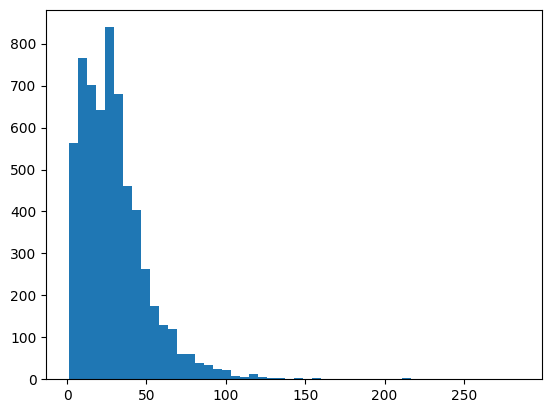

In [265]:
plt.hist([len(s) for s in clean_sentences], bins=50)
plt.show()

In [266]:
max_len = max(len(seq) for seq in clean_sentences)
print("Maximum sequence length:", max_len)

Maximum sequence length: 285


In [267]:
max_len = 50

X_train = pad_sequences(X_train_data, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test_data, maxlen=max_len, padding='post')

y_train = pad_sequences(Y_train_data, maxlen=max_len, padding='post')
y_test = pad_sequences(Y_test_data, maxlen=max_len, padding='post')

In [268]:
X_validation = X_test[:588]
x_final_test = X_test[588:]
y_validation = y_test[:588]
y_final_test = y_test[588:]

### Modelling

# RNN Model

In [269]:
Rnn_model = Sequential()
Rnn_model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=max_len))
Rnn_model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
Rnn_model.add(TimeDistributed(Dense(tag_size+1, activation='softmax')))

In [270]:
Rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Rnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 50, 128)           2077440   
                                                                 
 bidirectional_14 (Bidirect  (None, 50, 128)           24704     
 ional)                                                          
                                                                 
 time_distributed_14 (TimeD  (None, 50, 17)            2193      
 istributed)                                                     
                                                                 
Total params: 2104337 (8.03 MB)
Trainable params: 2104337 (8.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [276]:
history = Rnn_model.fit(X_train, y_train, batch_size=32, epochs=5 ,validation_data=(X_validation, y_validation),
                    validation_steps=30)

Epoch 1/5
151/151 [==============================] - ETA: 0s - loss: 0.1463 - accuracy: 0.9681

151/151 [==============================] - 14s 95ms/step - loss: 0.1463 - accuracy: 0.9681 - val_loss: 1.8694 - val_accuracy: 0.7915
Epoch 2/5
151/151 [==============================] - 14s 91ms/step - loss: 0.0872 - accuracy: 0.9824
Epoch 3/5
151/151 [==============================] - 14s 89ms/step - loss: 0.0604 - accuracy: 0.9872
Epoch 4/5
151/151 [==============================] - 13s 89ms/step - loss: 0.0477 - accuracy: 0.9888
Epoch 5/5
151/151 [==============================] - 14s 91ms/step - loss: 0.0405 - accuracy: 0.9898


#### RNN Evaluation

In [277]:
loss, accuracy = Rnn_model.evaluate(x_final_test, y_final_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

20/20 [==============================] - 0s 13ms/step - loss: 2.4684 - accuracy: 0.7812
Accuracy: 78.12%


# GRU MODEL

In [279]:
GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=max_len))
GRU_model.add(Bidirectional(GRU(units=64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
GRU_model.add(TimeDistributed(Dense(tag_size+1, activation='softmax')))

In [280]:
GRU_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
GRU_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 50, 128)           2077440   
                                                                 
 bidirectional_16 (Bidirect  (None, 50, 128)           74496     
 ional)                                                          
                                                                 
 time_distributed_16 (TimeD  (None, 50, 17)            2193      
 istributed)                                                     
                                                                 
Total params: 2154129 (8.22 MB)
Trainable params: 2154129 (8.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [281]:
history = GRU_model.fit(X_train, y_train, batch_size=32, epochs=5 ,validation_data=(X_validation, y_validation),
                    validation_steps=151)

Epoch 1/5
151/151 [==============================] - ETA: 0s - loss: 1.0062 - accuracy: 0.7129

151/151 [==============================] - 42s 227ms/step - loss: 1.0062 - accuracy: 0.7129 - val_loss: 1.0745 - val_accuracy: 0.7765
Epoch 2/5
151/151 [==============================] - 34s 228ms/step - loss: 0.1449 - accuracy: 0.9653
Epoch 3/5
151/151 [==============================] - 32s 212ms/step - loss: 0.0526 - accuracy: 0.9875
Epoch 4/5
151/151 [==============================] - 32s 211ms/step - loss: 0.0338 - accuracy: 0.9906
Epoch 5/5
151/151 [==============================] - 32s 214ms/step - loss: 0.0274 - accuracy: 0.9916


#### GRU Evaluation

In [282]:
loss, accuracy = GRU_model.evaluate(x_final_test, y_final_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

20/20 [==============================] - 1s 24ms/step - loss: 2.2004 - accuracy: 0.7823
Accuracy: 78.23%


# LSTM Model

In [283]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=max_len))
LSTM_model.add(Bidirectional(LSTM(units=64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
LSTM_model.add(TimeDistributed(Dense(tag_size+1, activation='softmax')))

In [284]:
LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 50, 128)           2077440   
                                                                 
 bidirectional_17 (Bidirect  (None, 50, 128)           98816     
 ional)                                                          
                                                                 
 time_distributed_17 (TimeD  (None, 50, 17)            2193      
 istributed)                                                     
                                                                 
Total params: 2178449 (8.31 MB)
Trainable params: 2178449 (8.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [285]:
history = LSTM_model.fit(X_train, y_train, batch_size=32, epochs=5 ,validation_data=(X_validation, y_validation),
                    validation_steps=30)

Epoch 1/5
151/151 [==============================] - ETA: 0s - loss: 1.2000 - accuracy: 0.6609

151/151 [==============================] - 42s 228ms/step - loss: 1.2000 - accuracy: 0.6609 - val_loss: 0.9545 - val_accuracy: 0.7202
Epoch 2/5
151/151 [==============================] - 32s 214ms/step - loss: 0.4192 - accuracy: 0.8767
Epoch 3/5
151/151 [==============================] - 32s 212ms/step - loss: 0.1073 - accuracy: 0.9766
Epoch 4/5
151/151 [==============================] - 32s 211ms/step - loss: 0.0510 - accuracy: 0.9882
Epoch 5/5
151/151 [==============================] - 33s 219ms/step - loss: 0.0354 - accuracy: 0.9902


#### LSTM Evaluation

In [286]:
loss, accuracy = LSTM_model.evaluate(x_final_test, y_final_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

20/20 [==============================] - 1s 26ms/step - loss: 2.0957 - accuracy: 0.7814
Accuracy: 78.14%


### Enhancement

In [292]:
def pridection(seq):
  X_ata = tokenizer.texts_to_sequences([seq.split()])
  X_est = pad_sequences(X_ata, maxlen=50, padding='post')
  ss = GRU_model.predict(X_est)[0]
  for word,i in zip(seq.split(),ss.argmax(axis=1)):
    if tag_tokenizer.index_word.get(i) == None:
      break
    print(word ,"------>",tag_tokenizer.index_word.get(i))

In [294]:
pridection("ذهب احمد الي الرحلة")

1/1 [==============================] - 0s 31ms/step
ذهب ------> verb
احمد ------> noun
الي ------> adp
الرحلة ------> noun


In [293]:
pridection("ذهب احمد الي الحديقة 15")

1/1 [==============================] - 0s 150ms/step
ذهب ------> verb
احمد ------> noun
الي ------> adp
الحديقة ------> noun
15 ------> num


In [295]:
pridection("رحل الرجل من المدينة الي مدينة , 65")

1/1 [==============================] - 0s 30ms/step
رحل ------> verb
الرجل ------> noun
من ------> adp
المدينة ------> noun
الي ------> adp
مدينة ------> noun
, ------> punct
65 ------> num


#### Done!